In [147]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels as statsmodels
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score
plt.style.use(['fivethirtyeight'])
np.set_printoptions(formatter={'float_kind':'{:f}'.format})
plt.rcParams['font.family'] = 'serif'


In [121]:
# Loading data from csv to the numpy array
X = pd.read_csv('/Users/user/Desktop/UCL_CS_Masters/machine_learning/coding/case3/X.csv', header=None).values
y = pd.read_csv('/Users/user/Desktop/UCL_CS_Masters/machine_learning/coding/case3/y.csv', header=None).values

In [129]:
# Dividing data into training and testing sets
XTrain = X[:3500,:]
yTrain = y[:3500, :]
XTest = X[3500:, :]
yTest = y[3500:, :]

In [158]:
# Finding Beta coefficients of the Logistic model 
beta = sm.GLM(yTrain, sm.add_constant(XTrain),family=sm.families.Binomial(),link=sm.families.links.logit()).fit()
# Using the model class to describe the model 
trainModel = statsmodels.discrete.discrete_model.Logit(yTrain, sm.add_constant(XTrain), params=beta.params)
# Using the class method to get the scores (probabilities)
pTrain = trainModel.predict(params=beta.params, exog=sm.add_constant(XTrain)) #add_constant() adds the intercept
pTest = trainModel.predict(params=beta.params, exog=sm.add_constant(XTest))

In [157]:
# Assesing the performance of the model
fpr_train, tpr_train, thresholds_train = metrics.roc_curve(yTrain, pTrain, pos_label=1)
fpr_test, tpr_test, thresholds_test = metrics.roc_curve(yTest, pTest, pos_label=1)
# Assesing AUC Score 
auc_train = roc_auc_score(yTrain, pTrain)
auc_test = roc_auc_score(yTest, pTest)
print('AUC Score for the training set {:4.3f} \nAuc Score for the testing set {:4.3f}'.format(auc_train, auc_test))

AUC Score for the training set 0.646 
Auc Score for the testing set 0.671


Text(0.5, 1.0, 'ROC curve')

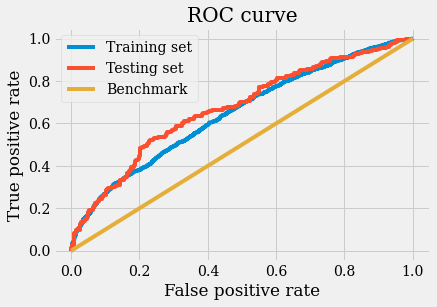

In [156]:
# Plotting
plt.plot(fpr_train,tpr_train, label = 'Training set')
plt.plot(fpr_test, tpr_test, label = 'Testing set')
plt.plot([0,1], label='Benchmark')
plt.legend(loc = 'best')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')